
# Trabajo practico semana 1:
### Nicolas Pereyra

### Consigna:
1) Obtener la función transferencia V2/V1 ( módulo , fase y diagrama de polos y ceros).
2) ¿Qué tipo de filtro es?
3) Obtenga la función transferencia, pero normalizada. ¿Cuál sería en este caso la norma de frecuencia y qué interpretación circuital podría tener?
4) Simule la función transferencia normalizada (Python, Matlab, etc.).
5) Simule el circuito y obtenga la respuesta en frecuencia pedida en 1), para los valores:  R2/R1=1; R3=1kΩ y C=1µF
6) ¿Qué utilidad podría tener este tipo de circuitos?

# 1)
## Funcion transferecia:
\begin{equation}
H(s)= \frac{s-\frac{R2}{R1.R3.C1}}{s+\frac{1}{R3.C1}}
\end{equation}

## Modulo:
\begin{equation}
H(w)= \frac{\sqrt{w²+ (\frac{R2}{R1.R3.C1}})²}{\sqrt{w²+ (\frac{1}{R3.C1}})²}
\end{equation}


## Fase
\begin{equation}
\varphi(w)= arctan(\frac{-w.R1.R3.C1}{R2})-arctan(w.R3.C1)
\end{equation}


## Diagrama de polos y ceros:
Se graficaran variando la relacion R2/R1

(3, <Axes: xlabel='$\\sigma$', ylabel='j$\\omega$'>)

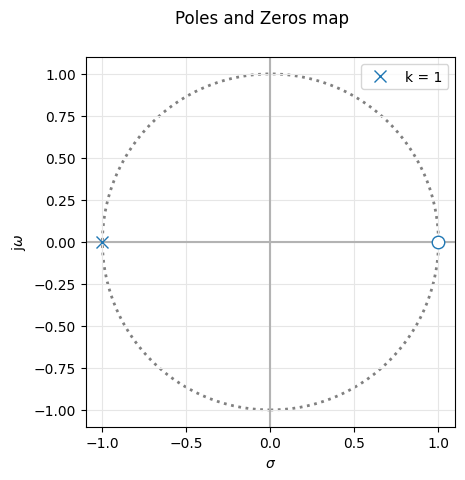

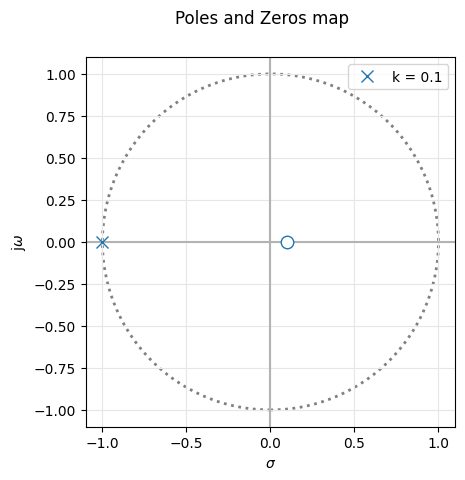

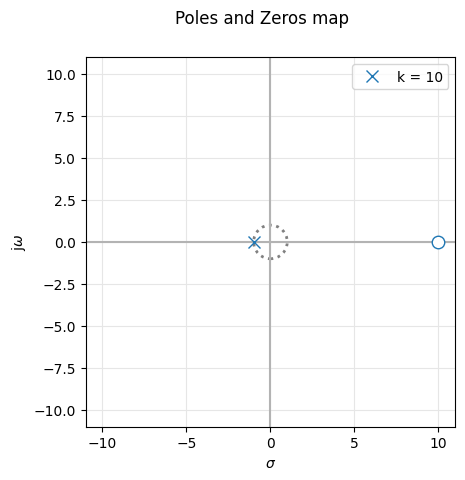

In [5]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Apr 12 16:35:49 2023

@author: nico
"""
# Librerías externas NumPy, SciPy y Matplotlib
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt

# Librería de TC2, esta la vas a usar mucho
from pytc2.sistemas_lineales import pzmap, bodePlot


k1 = 1 # k = R2/R1 = 1
k2 = 0.1 # k = R2/R1 < 1
k3 = 10 # k = R2/R1 > 1

plt.close('all')


    
my_tf1 = TransferFunction( [1, -k1], [1, 1],) 
my_tf2 = TransferFunction( [1, -k2], [1, 1],) 
my_tf3 = TransferFunction( [1, -k3], [1, 1],) 

pzmap(my_tf1, fig_id=1, filter_description = ('k = '+str(k1))) #S plane pole/zero plot
pzmap(my_tf2, fig_id=2, filter_description = ('k = '+str(k2))) #S plane pole/zero plot
pzmap(my_tf3, fig_id=3, filter_description = ('k = '+str(k3))) #S plane pole/zero plot


Se puede apreciar en los gradficos de polos y ceros 

# 2)
Se puede observar desde el diagrama de polos y ceros, y se verificara mas adelante con el diagrama de bode, que el filtro variara su comportamiento dependiendo del valor de R2/R1. En el primer diagrama de polos y zeros se puede observar que la relacion R2/R1 es igual a 1 y que tanto el polo y el cero que tiene la trasferencia se encuentran en la misma circunferencia probocando que se cancelen sus aportes, comportantodse ene este caso como un filtro pasa todo. Por otro lado, se puede observar en el segundo diagrama de polos y zeros que el polo se encuentra en una circunferencia respecto al origen distinta a la del cero, y el cero se encuentra mas proximo al origen. Esta proximidad al origen hara que el filtro tenga una atenuacion para bajas frecuencias haciendo que el filtro se comporte como un pasa altos. Finalmente, en el ultimo diagrama de polos y ceros ocurre lo mismo que en el caso anterior pero en este caso el polo se encuentra mas proximo al origen esto genera una amplificacion de la señal para frecuencias bajas y una trasferencia de 0db para el frecuencias altas, comportandose como un filtro pasa todo con amplificacion para bajas frecuencias.
En conclusion:
1) Si R2/R1 = 1 el filtro va a ser un Pasa Todo
2) Si R2/R1 < 1 el filtro va a ser un Pasa Altos
3) Si R2/R1 > 1 el filtro va a ser un Pasa Todo con amplificacion para bajas frecuencias


## 3)
### Funcion trasferecia normalizada por frecuecia:
\begin{equation}
H($)= \frac{$-\frac{R2}{R1}}{$+1}
\end{equation}

Siendo s igual a:
\begin{equation}
    s = $.w_d
\end{equation}

Y siendo la velocidad angular normalizada:
\begin{equation}
    w_d = \frac{1}{R3.C1}
\end{equation}


## 4)
(Los graficos se hicieron en un inicio con el spyder pero se tuvo un problema al simular en k = 1 y se simularon con el ltspice en esa situacion. Igualmente se mostraran los graficos generados por el spyder con su error en la magnitud)

# Grafico del modulo y fase:
## Spyder

(6,
 array([<Axes: title={'center': 'Magnitude response'}, ylabel='Magnitude [dB]'>,
        <Axes: title={'center': 'Phase response'}, xlabel='Angular frequency [rad/sec]', ylabel='Phase [rad]'>],
       dtype=object))

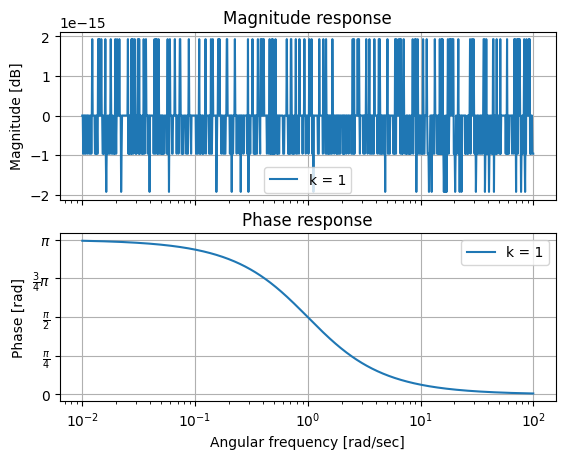

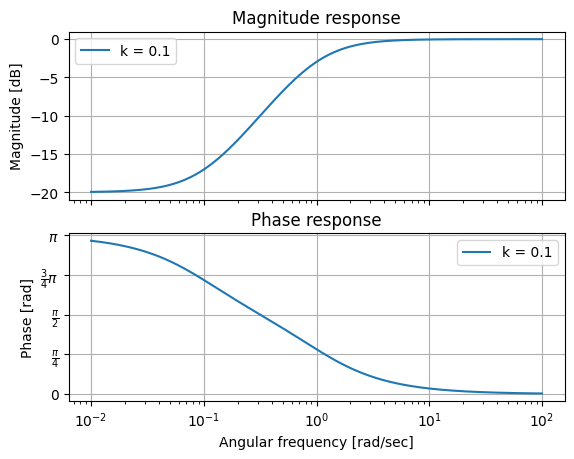

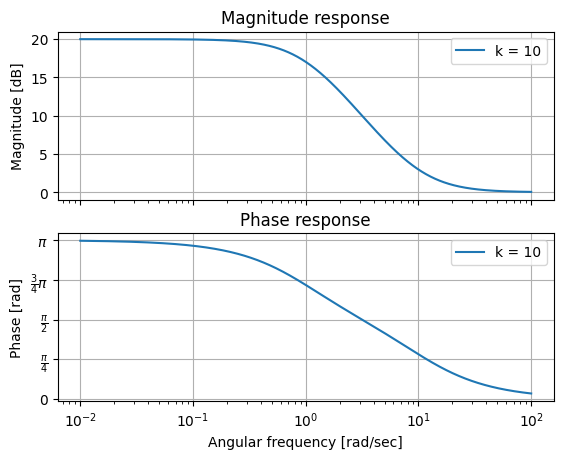

In [6]:
bodePlot(my_tf1, fig_id=4, filter_description = ('k = '+str(k1)))
bodePlot(my_tf2, fig_id=5, filter_description = ('k = '+str(k2)))
bodePlot(my_tf3, fig_id=6, filter_description = ('k = '+str(k3)))


En estas simulaciones hechas con el spyder se puede confirmasr lo dicho en el punto 2 hacerca del comportamiento de los filtros. Ademas del compartamiento predicho se pueden obserbar que la fase va de pi a 0 en todos los casos pero con distinta pendiente. Siendo que para R2/R1 pi/2 ocurra en wo y en los otros casos pi/2 se adenanta o atrasa a wo, se adelanta para R2/R1 < 1 y se atrasa para R2/R1 > 1.

## 5)
### Simulacion con los valores dados
(R2/R1=1; R3=1kΩ y C=1µF)

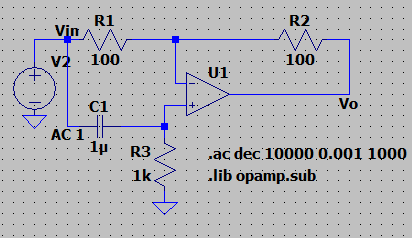

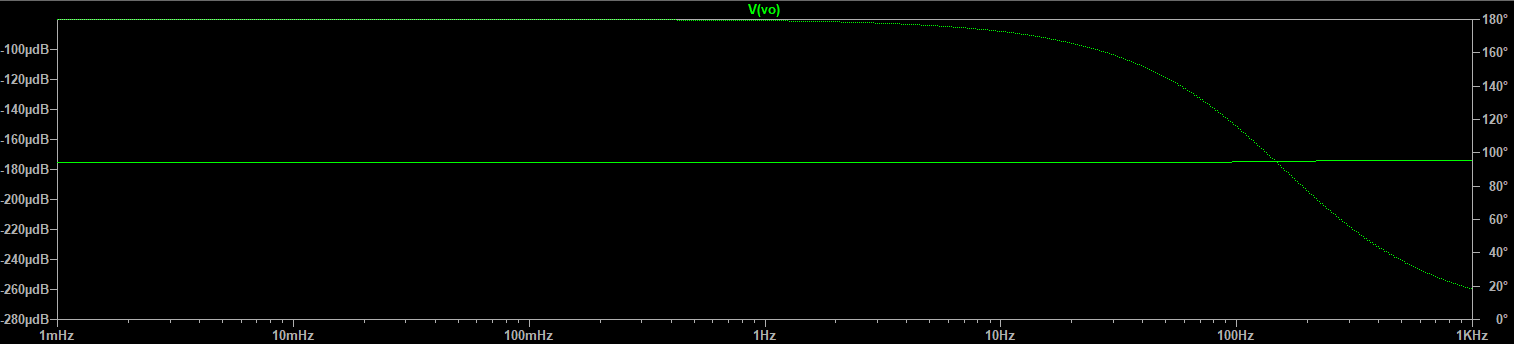

\begin{equation}
H(s)= \frac{s-1000}{s+1000}
\end{equation}
\begin{equation}
wo = 1000 ; k = 1
\end{equation}

### Modulo:
\begin{equation}
H(w)= \frac{\sqrt{w²+ (1000})²}{\sqrt{w²+ (1000})²} = 1
\end{equation}

### Fase
\begin{equation}
\varphi(w)= arctan(\frac{-w}{1000})-arctan(\frac{w}{1000}) = -2.arctan(\frac{w}{1000})
\end{equation}

\begin{equation}
\varphi(w_o)= -2.arctan(\frac{w_o}{1000})= -\frac{\pi}{2}
\end{equation}

En este caso se puede observar un filtro pasa todo ideal.

## Resolucion de la trasferencia:
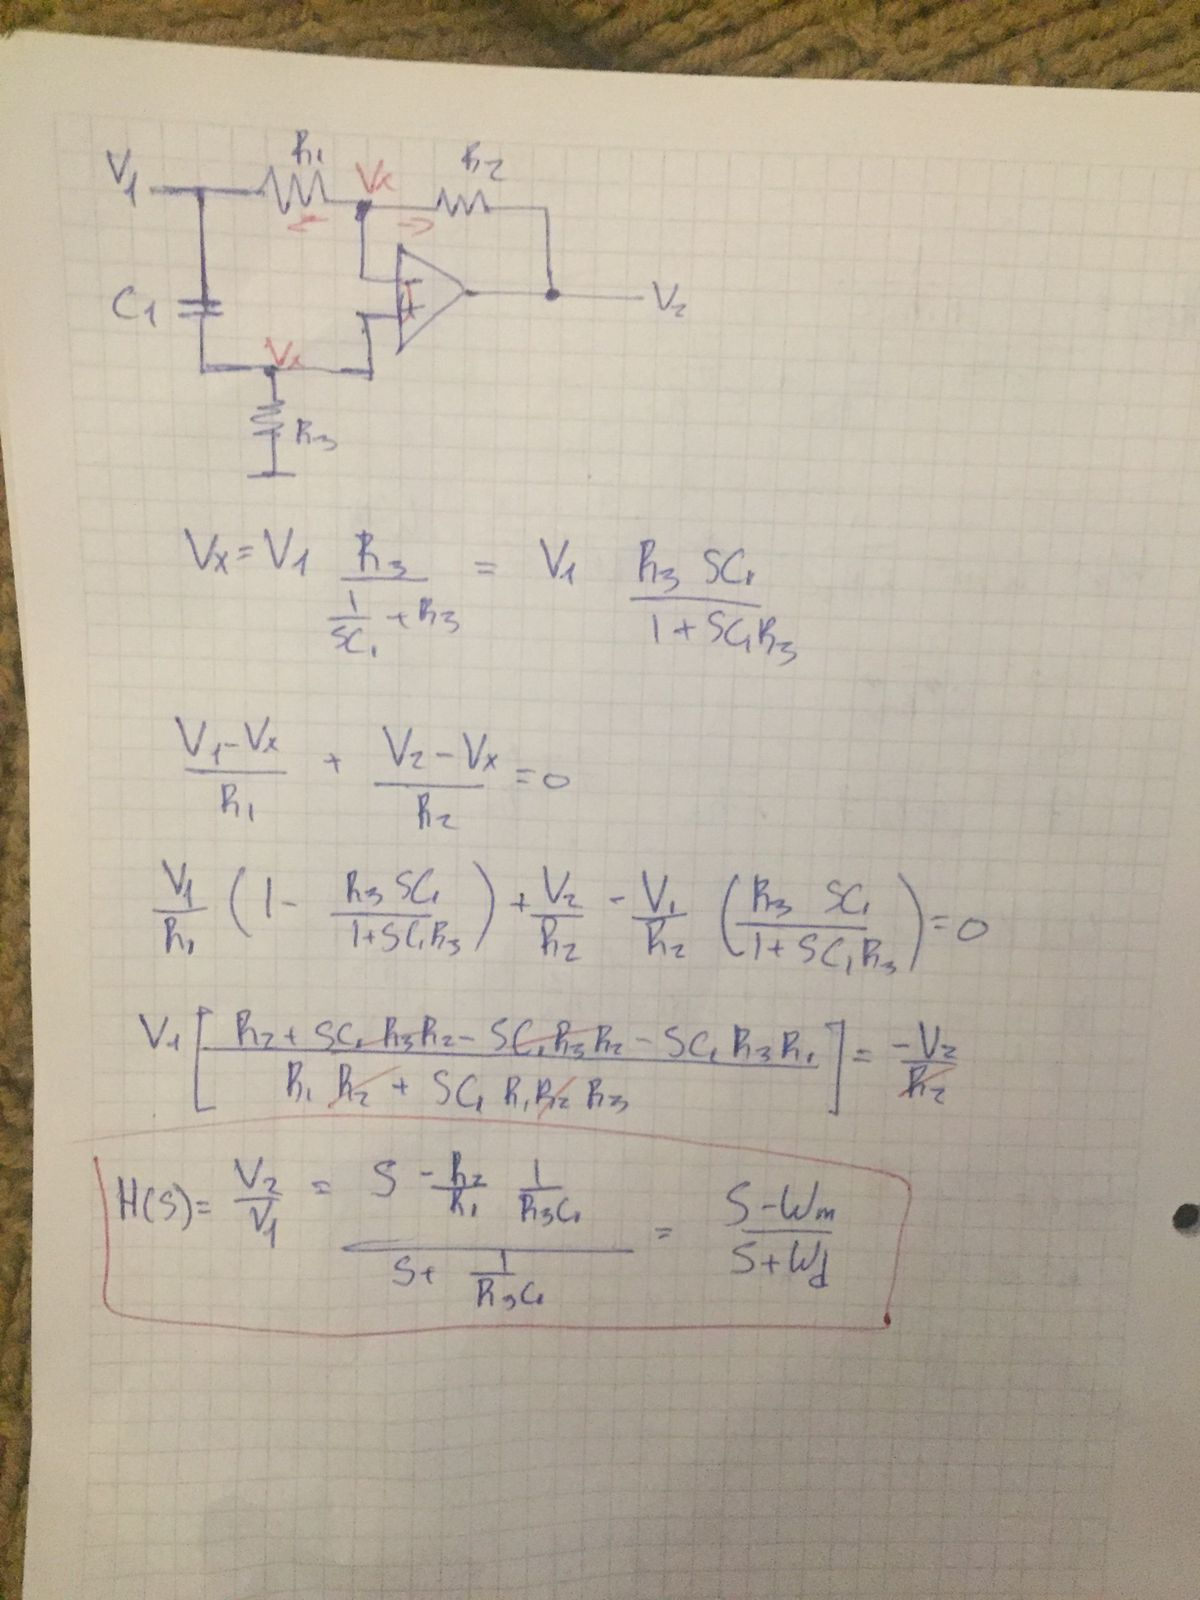

# 6)
El filtro pasa todo tiene su uso en la correccion de señales que se encuentren desfasadas en las cuales se quiere mantener su amplitud.